In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
import tensorflow as tf

In [3]:
sess = tf.Session()

In [4]:
iris = datasets.load_iris()

In [29]:
binary_target = np.array([1.0 if x == 0 else 0.0 for x in iris.target])
iris_2d = np.array([[x[2], x[3]] for x in iris.data])

In [9]:
batch_size = 20
x1_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
x2_data = tf.placeholder(shape = [None, 1], dtype = tf.float32)
y_target = tf.placeholder(shape = [None, 1], dtype = tf.float32)
A = tf.Variable(tf.random_normal(shape = [1, 1]))
b = tf.Variable(tf.random_normal(shape = [1, 1]))

In [11]:
my_mult = tf.matmul(x2_data, A)
my_add = tf.add(my_mult, b)
my_output = tf.subtract(x1_data, my_add)

In [13]:
xentropy = tf.nn.sigmoid_cross_entropy_with_logits(logits = my_output, labels = y_target)

In [14]:
my_opt = tf.train.GradientDescentOptimizer(0.05)

In [15]:
train_step = my_opt.minimize(xentropy)

In [17]:
init = tf.global_variables_initializer()
sess.run(init)

In [30]:
for i in range(1000):
    rand_index = np.random.choice(len(iris_2d), size = batch_size)
    rand_x = iris_2d[rand_index]
    rand_x1 = np.array([[x[0]] for x in rand_x])
    rand_x2 = np.array([[x[1]] for x in rand_x])
    rand_y = np.array([[y] for y in binary_target[rand_index]])
    sess.run(train_step, feed_dict = {x1_data:rand_x1, x2_data:rand_x2, y_target:rand_y})
    if (i + 1) % 200 == 0:
        print('Step #' + str(i + 1) + ' A = ' + str(sess.run(A)) + ', b = ' + str(sess.run(b)))

Step #200 A = [[8.653716]], b = [[-3.599789]]
Step #400 A = [[10.21424]], b = [[-4.719426]]
Step #600 A = [[11.095941]], b = [[-5.4435983]]
Step #800 A = [[11.837648]], b = [[-5.936724]]
Step #1000 A = [[12.396243]], b = [[-6.390152]]


In [33]:
[[ slope ]] = sess.run(A)

In [34]:
slope

12.396243

In [35]:
sess.run(A)

array([[12.396243]], dtype=float32)

In [36]:
[[ intercept ]] = sess.run(b)

In [37]:
intercept

-6.390152

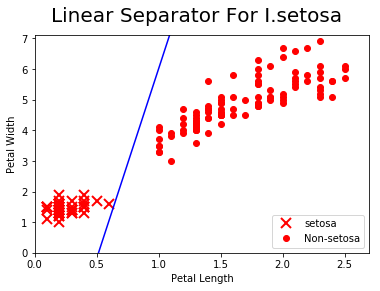

In [43]:
ablineValues = []
x = np.linspace(0, 3, num=50)
ablineValues = []
for i in x:
    ablineValues.append(slope*i+intercept)
setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==1]
setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==1]
non_setosa_x = [a[1] for i,a in enumerate(iris_2d) if binary_target[i]==0]
non_setosa_y = [a[0] for i,a in enumerate(iris_2d) if binary_target[i]==0]
plt.plot(setosa_x, setosa_y, 'rx', ms=10, mew=2, label='setosa''')
plt.plot(non_setosa_x, non_setosa_y, 'ro', label='Non-setosa')
plt.plot(x, ablineValues, 'b-')
plt.xlim([0.0, 2.7])
plt.ylim([0.0, 7.1])
plt.suptitle('Linear Separator For I.setosa', fontsize=20)
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.legend(loc='lower right')
plt.show()